In [23]:
import numpy as np
from gnss_func.model import single_polarization
from gnss_func.utils import lin2dBm
import tensorly as tl
import matplotlib.pyplot as plt

In [14]:
nAntennas = 8
B = 1023e6
Tc = 1/B
T  = 1e-3
IDsat = 20

factor = 0
tau_los = 0.5*Tc
tau_vec = np.array([tau_los,tau_los + factor*Tc])
theta_deg_vec = np.array([45,55])
number_of_epochs = 30
delayGranularity = 11

In [15]:
print(tau_vec)

[4.88758553e-10 4.88758553e-10]


In [16]:
gnss_model = single_polarization(nAntennas, B, T, Tc,delayGranularity, tau_vec, theta_deg_vec, number_of_epochs, IDsat,'Qw')


In [17]:
gnss_model.rx_signal(48)

In [18]:
from gnss_func.estimators import singlePolModel_estimator

In [19]:
theta_deg_space = np.linspace(35,75,100)

In [20]:
estimator_model = singlePolModel_estimator(gnss_model,delayGranularity,theta_deg_space)


In [21]:
rmse = estimator_model.rmse(tau_los)

In [22]:
print(rmse)
print(estimator_model.tau_los_est)
print(tau_los)

0.14652612805474097
0.0
4.887585532746823e-10


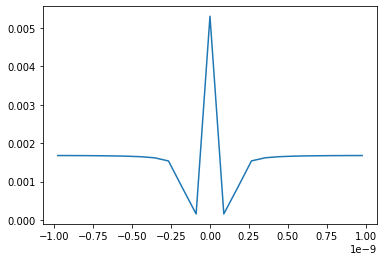

In [24]:
plt.plot(estimator_model.tau_space,np.fft.fftshift(np.abs(estimator_model.beta_tau)**2))
plt.show()

In [29]:
a =np.random.rand(1).item()
print(a)

0.12329696694712355


(2046000, 7)